# Logistic Regression Demo

In [9]:
#require "jupyter-archimedes"
#directory "_build"
#load "matrix.cmo"
#use "matrix.ml"
#use "logistic_regression.ml"

type t = { dimensions : int * int; matrix : float list list; }
exception InvalidDimensions of string
val dim : t -> int * int = <fun>
val matrix : t -> float list list = <fun>
val fill : int -> int -> float -> t = <fun>
val zero : int -> int -> t = <fun>
val eye : int -> t = <fun>
val transpose : t -> t = <fun>
val mult : t -> t -> t = <fun>
val to_array : 'a list list -> 'a array array = <fun>
val to_list : 'a array array -> 'a list list = <fun>
val swap : 'a array -> int -> int -> unit = <fun>
val rref : t -> t = <fun>
val construct : float list list -> t = <fun>
val lu_decomp : t -> t * t = <fun>
val concat : t -> t -> t = <fun>
val invert : t -> t = <fun>
val scale : t -> float -> t = <fun>
val det : t -> float = <fun>
val magnitude : t -> float = <fun>
val normalize : t -> t = <fun>
val eigen : t -> bool -> float * t = <fun>
val elem_pow : t -> float -> t = <fun>
val pinv : t -> t = <fun>
val op : t -> t -> (float -> float -> float) -> t = <fun>
val dot : t -> t -> float = <fun>
v

In [23]:
(* Generating training data for logistic fit *)
(* Generate x values for training *)
(* let rec gen_xy num_points = 
    let x = (Random.float 1.0) *. 100 in
    let diff_from_50 = abs_float (50.0 -. x) in *)
    
let x = [-0.1; -0.2; -0.25; -0.3; 0.7; 0.8; 0.85; 0.9]
let y = [1.; 1.; 1.; 1.; 0.; 0.; 0.; 0.]

let rec gen_pp acc x_lst y_lst = 
    match x_lst with 
    | [] -> acc 
    | x :: xs -> 
        match y_lst with 
        | [] -> assert false
        | y :: ys -> 
            gen_pp ((x, y) :: acc) xs ys
let pp = gen_pp [] x y


(* Transforming training data to matrix *)
let x = [x] |> construct |> transpose 
let y = [y] |> construct |> transpose 
(* let theta = fit x y |> matrix |> List.hd *)
let theta = (fit x y 0.1 1000) |> matrix

(* Function for graphing *)
let f x = 
    match theta with 
    | [ [ a ] ] -> 1. /. (1. +. (e ** (-1. *. a *. x)))
    | _ -> assert false
    


val x : float list = [-0.1; -0.2; -0.25; -0.3; 0.7; 0.8; 0.85; 0.9]


val y : float list = [1.; 1.; 1.; 1.; 0.; 0.; 0.; 0.]


val gen_pp : ('a * 'b) list -> 'a list -> 'b list -> ('a * 'b) list = <fun>


val pp : (float * float) list =
  [(0.9, 0.); (0.85, 0.); (0.8, 0.); (0.7, 0.); (-0.3, 1.); (-0.25, 1.);
   (-0.2, 1.); (-0.1, 1.)]


val x : Matrix.t = <abstr>


val y : Matrix.t = <abstr>


val theta : float list list = [[-11.4420124150070848]]


val f : float -> float = <fun>


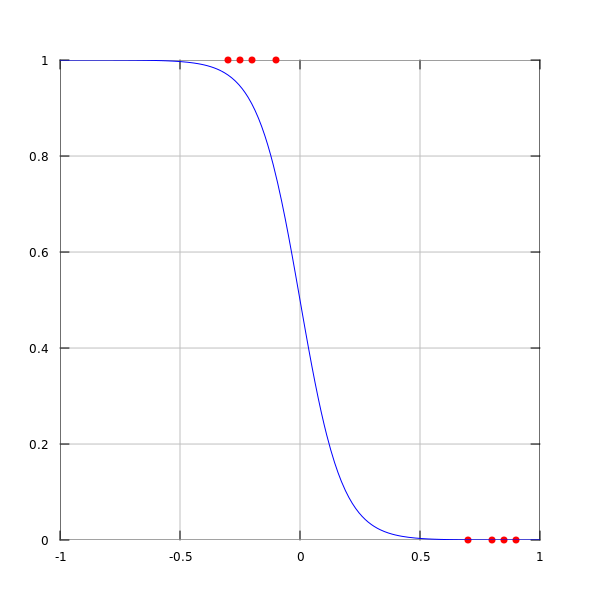

- : unit = ()


In [24]:
(* Plot using Archimedes *)
let vp = A. init ~w:600. ~h:600. ["jupyter"] in
    A.Axes.box vp ;
    A.set_color vp A.Color.red ;
    A.List.xy_pairs vp pp ;
    A.set_color vp A.Color.blue ;
    A.fx vp f (-1.0) 1.0 ;
    A.close vp

error: compile_error